# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [43]:
# Dependencies and Setup
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
# Display the data table for preview
mouse_merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [44]:
# Checking the number of mice.
print(len(mouse_merge_df['Mouse ID'].unique()))

249


In [45]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = mouse_merge_df[mouse_merge_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
print(duplicate_mice['Mouse ID'].unique())


['g989']


In [46]:
# Optional: Get all the data for the duplicate mouse ID. 
filtered_df = duplicate_mice[duplicate_mice['Mouse ID'] == 'g989']
filtered_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [47]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_clean_df = mouse_merge_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='first')
mouse_clean_df[mouse_clean_df['Mouse ID'] == 'g989']

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
912,g989,Propriva,Female,21,26,10,51.745156,0
914,g989,Propriva,Female,21,26,15,51.325852,1
916,g989,Propriva,Female,21,26,20,55.326122,1
918,g989,Propriva,Female,21,26,25,56.045564,1
919,g989,Propriva,Female,21,26,30,59.082294,1
920,g989,Propriva,Female,21,26,35,62.570880,2


In [50]:
# Checking the number of mice in the clean DataFrame.
print(len(mouse_clean_df['Mouse ID'].unique()))

249


In [51]:
mean = mouse_clean_df.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)']
median = mouse_clean_df.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)']
std = mouse_clean_df.groupby(['Drug Regimen']).std()['Tumor Volume (mm3)']
variance = mouse_clean_df.groupby(['Drug Regimen']).var()['Tumor Volume (mm3)']
sem = mouse_clean_df.groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)']
print(f"{mean}, {median}, {std}, {variance}, {sem}")

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.393463
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64, Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.909965
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64, Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.568014
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64, Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Prop

## Summary Statistics

In [52]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
drug_types = mouse_clean_df['Drug Regimen'].unique()
summary_df = pd.DataFrame({"mean": mean,
                          "median": median,
                          "Std Dev": std,
                          "variance": variance,
                          "SEM": sem})
summary_df


,mean,median,Std Dev,variance,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,54.331565,52.509285,8.134708,66.173479,0.596466
Placebo,54.033581,52.288934,7.821003,61.168083,0.581331
Propriva,52.393463,50.909965,6.568014,43.138803,0.525862
Ramicane,40.216745,40.673236,4.846308,23.486704,0.320955
Stelasyn,54.233149,52.431737,7.710419,59.450562,0.573111


In [53]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
drug_types

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

## Bar and Pie Charts

In [54]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.



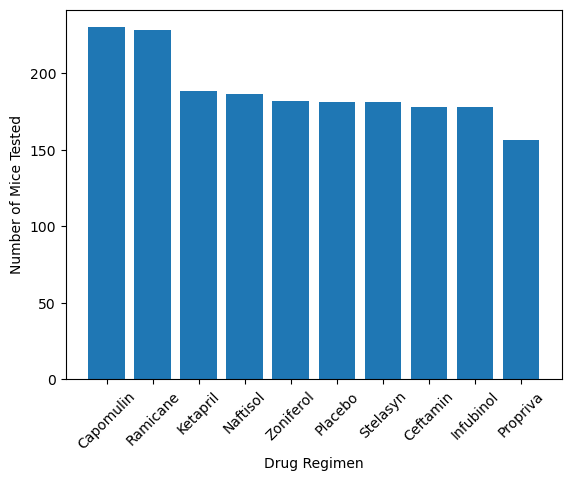

In [55]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
counts = mouse_clean_df.groupby('Drug Regimen')['Timepoint'].count()
counts = counts.sort_values(ascending=False)

# Create the bar plot
plt.bar(counts.index, counts.values)

# Set the xlabel and ylabel using class methods
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')

plt.xticks(rotation=45)

# Display the plot
plt.show()


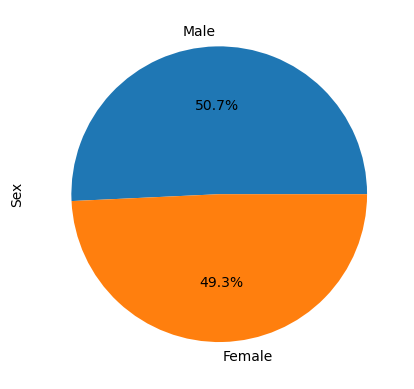

In [56]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Calculate the count of female and male mice
gender_counts = mouse_clean_df['Sex'].value_counts()

# Create a pie plot
gender_counts.plot(kind='pie', autopct='%1.1f%%')

# Display the plot
plt.show()


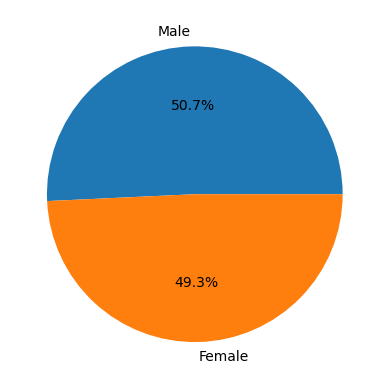

In [57]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender_counts = mouse_clean_df['Sex'].value_counts()

# Create a list of counts for female and male mice
counts = gender_counts.values

# Create a list of labels for the pie plot
labels = gender_counts.index

# Create a pie plot
plt.pie(counts, labels=labels, autopct='%1.1f%%')

# Display the plot
plt.show()

## Quartiles, Outliers and Boxplots

In [58]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = mouse_clean_df.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_mouse_df = pd.merge(last_timepoint, mouse_clean_df, on=['Mouse ID', 'Timepoint'])

In [59]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volumes = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    volumes = merged_mouse_df.loc[merged_mouse_df['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volumes.append(volumes)
    
    # Calculate the quartiles, IQR, and bounds for potential outliers
    quartiles = volumes.quantile([0.25, 0.5, 0.75])
    lower_bound = quartiles[0.25] - 1.5 * (quartiles[0.75] - quartiles[0.25])
    upper_bound = quartiles[0.75] + 1.5 * (quartiles[0.75] - quartiles[0.25])
    
    # Determine potential outliers
    outliers = volumes.loc[(volumes < lower_bound) | (volumes > upper_bound)]
    
    # Determine outliers using upper and lower bounds
    print(f"{treatment}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


Text(0.5, 1.0, 'Distribution of Tumor Volume for Each Treatment Group')

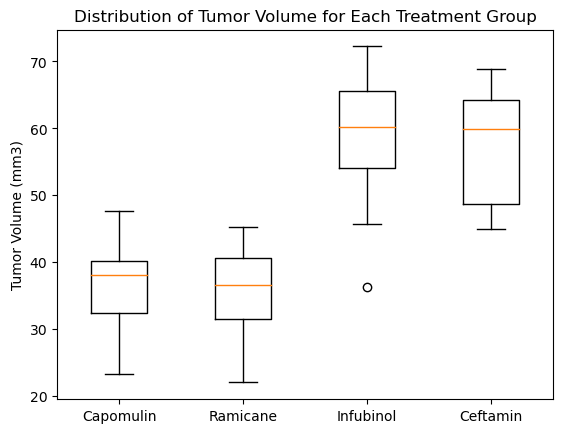

In [60]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# Create the box plot
plt.boxplot(tumor_volumes, labels=treatments)

# Set the y-axis label
plt.ylabel('Tumor Volume (mm3)')

# Set the title
plt.title('Distribution of Tumor Volume for Each Treatment Group')


In [61]:
#Picking a mouse treated with Capomulin
mouse_clean_df[mouse_clean_df['Drug Regimen'] == 'Capomulin']

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


## Line and Scatter Plots

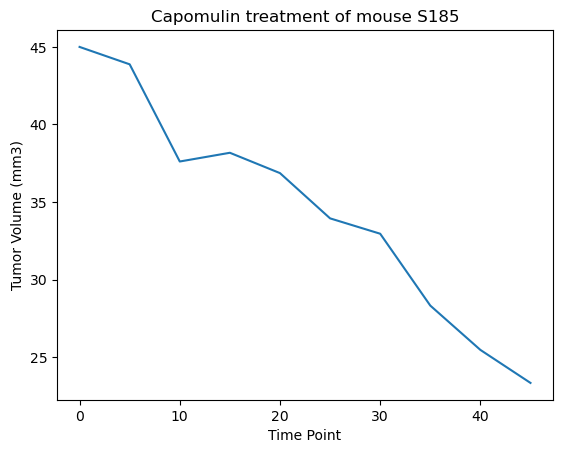

In [62]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_data = mouse_clean_df.loc[(mouse_clean_df['Drug Regimen'] == 'Capomulin') & (mouse_clean_df['Mouse ID'] == 's185')]

# Create the line plot
plt.plot(capomulin_data['Timepoint'], capomulin_data['Tumor Volume (mm3)'])

# Set the x-axis label
plt.xlabel('Time Point')

# Set the y-axis label
plt.ylabel('Tumor Volume (mm3)')

# Set the title
plt.title(f'Capomulin treatment of mouse S185')

# Display the plot
plt.show()



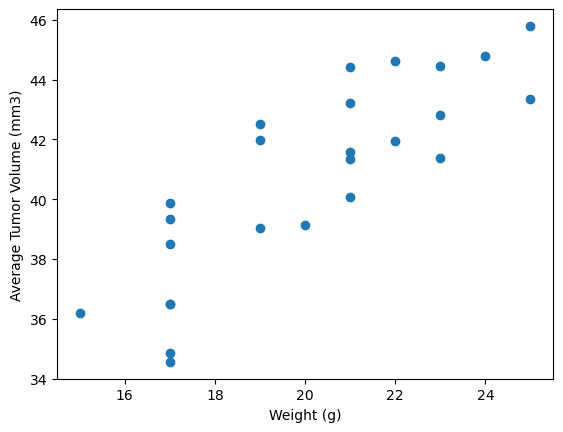

In [63]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_data = mouse_clean_df[mouse_clean_df['Drug Regimen'] == 'Capomulin']

avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

plt.scatter(mouse_weight, avg_tumor_volume)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()


## Correlation and Regression

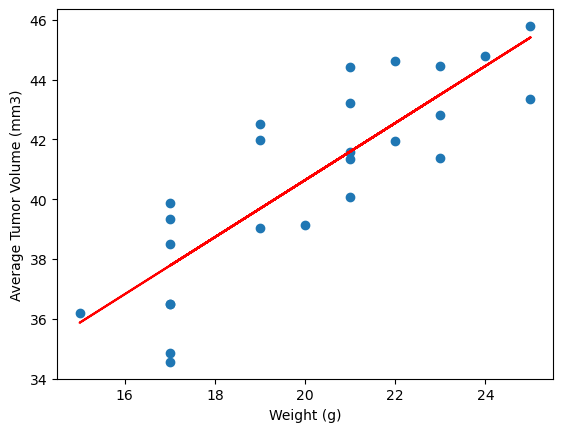

In [65]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
slope, intercept, rvalue, pvalue, stderr = linregress(mouse_weight, avg_tumor_volume)
correlation_coefficient = rvalue ** 2
plt.scatter(mouse_weight, avg_tumor_volume)
regression_values = slope * mouse_weight + intercept
plt.plot(mouse_weight, regression_values, color='red')

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()
